<h1 align=center><font size = 6, color = blue>Model Development</font></h1>

In [1]:
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("../Data Wrangling/klinik_bewertungen_afterWrangling.csv")
df.head(2)

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,Qualität der Beratung,Mediz. Behandlung,Verwaltung und Abläufe,Ausstattung und Gestaltung,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,0.00,0.0,2021,6,7,100.0,100.0,100.0,100.0,100.0
1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,0.34,0.0,2021,5,25,100.0,100.0,100.0,100.0,67.0


In [4]:
df_kliniks=df[['Name der Klinik','Polaritiy','Gesamt','Qualität', 'Behandlung', 'Verwaltung', 'Ausstattung']].groupby(['Name der Klinik'],as_index=False).mean()
df_kliniks.head(2)

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung
0,AMEOS Klinikum Hildesheim,0.07040,34.319767,37.581395,33.337209,34.116279,32.610465
1,AMEOS Klinikum Seepark Geestland,0.27478,70.861111,74.555556,76.173611,69.034722,66.701389


In [5]:
Rezension_zahl=df.groupby(['Name der Klinik'],as_index=False).count()["Erfahrungsbericht"].to_list()
Rezension_zahl

[172, 144, 241, 49, 123, 124, 128, 118, 77, 145, 105, 232, 122, 86, 52, 77, 63]

In [6]:
df_fach=df.groupby(['Name der Klinik','Fachbereich'],as_index=False).count()[['Name der Klinik',"Fachbereich"]]
df_fach_arten=df_fach.groupby(['Name der Klinik'],as_index=False).count()
Fach_arten=df_fach_arten["Fachbereich"].to_list()
Fach_arten

[6, 7, 25, 8, 14, 18, 12, 16, 11, 18, 4, 19, 17, 14, 4, 10, 14]

In [7]:
df_kliniks["Fach_arten"]=Fach_arten
df_kliniks

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten
0,AMEOS Klinikum Hildesheim,0.070400,34.319767,37.581395,33.337209,34.116279,32.610465,6
1,AMEOS Klinikum Seepark Geestland,0.274780,70.861111,74.555556,76.173611,69.034722,66.701389,7
2,DIAKOVERE Henriettenstift,0.235991,60.165975,65.157676,69.854772,55.095436,62.414938,25
3,Eilenriede Klinik Hannover,0.449850,84.367347,85.040816,86.408163,87.816327,81.000000,8
4,HELIOS Klinik Cuxhaven,0.261306,56.910569,59.349593,63.959350,56.130081,57.219512,14
5,Helios Kliniken Mittelweser,0.256709,54.572581,56.185484,59.403226,55.693548,57.580645,18
6,Herzogin Elisabeth Hospital,0.371762,79.179688,78.414062,81.773438,75.835938,75.335938,12
7,KRH Klinikum Agness Karll Laatzen,0.184622,48.610169,57.076271,64.135593,50.635593,41.855932,16
8,Klinik am Zuckerberg,0.472796,91.350649,90.922078,92.649351,89.649351,90.090909,11
9,Klinikum Peine,0.275747,62.317241,67.379310,71.282759,64.634483,55.924138,18


In [8]:
df_kliniks["Rezension_zahl"]=Rezension_zahl
df_kliniks

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl
0,AMEOS Klinikum Hildesheim,0.070400,34.319767,37.581395,33.337209,34.116279,32.610465,6,172
1,AMEOS Klinikum Seepark Geestland,0.274780,70.861111,74.555556,76.173611,69.034722,66.701389,7,144
2,DIAKOVERE Henriettenstift,0.235991,60.165975,65.157676,69.854772,55.095436,62.414938,25,241
3,Eilenriede Klinik Hannover,0.449850,84.367347,85.040816,86.408163,87.816327,81.000000,8,49
4,HELIOS Klinik Cuxhaven,0.261306,56.910569,59.349593,63.959350,56.130081,57.219512,14,123
5,Helios Kliniken Mittelweser,0.256709,54.572581,56.185484,59.403226,55.693548,57.580645,18,124
6,Herzogin Elisabeth Hospital,0.371762,79.179688,78.414062,81.773438,75.835938,75.335938,12,128
7,KRH Klinikum Agness Karll Laatzen,0.184622,48.610169,57.076271,64.135593,50.635593,41.855932,16,118
8,Klinik am Zuckerberg,0.472796,91.350649,90.922078,92.649351,89.649351,90.090909,11,77
9,Klinikum Peine,0.275747,62.317241,67.379310,71.282759,64.634483,55.924138,18,145


In [9]:
df_kliniks.columns

Index(['Name der Klinik', 'Polaritiy', 'Gesamt', 'Qualität', 'Behandlung',
       'Verwaltung', 'Ausstattung', 'Fach_arten', 'Rezension_zahl'],
      dtype='object')

In [10]:
df_model=df_kliniks[['Polaritiy', 'Gesamt', 'Qualität', 'Behandlung',
       'Verwaltung', 'Ausstattung', 'Rezension_zahl', 'Fach_arten']]
df_model.head()

,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Rezension_zahl,Fach_arten
0,0.070400,34.319767,37.581395,33.337209,34.116279,32.610465,172,6
1,0.274780,70.861111,74.555556,76.173611,69.034722,66.701389,144,7
2,0.235991,60.165975,65.157676,69.854772,55.095436,62.414938,241,25
3,0.449850,84.367347,85.040816,86.408163,87.816327,81.000000,49,8
4,0.261306,56.910569,59.349593,63.959350,56.130081,57.219512,123,14


In [11]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_model)

In [12]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 3, 0, 0], dtype=int32)

In [13]:
df_kliniks.insert(9, 'Cluster Labels', kmeans.labels_)
df_kliniks

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl,Cluster Labels
0,AMEOS Klinikum Hildesheim,0.070400,34.319767,37.581395,33.337209,34.116279,32.610465,6,172,1
1,AMEOS Klinikum Seepark Geestland,0.274780,70.861111,74.555556,76.173611,69.034722,66.701389,7,144,1
2,DIAKOVERE Henriettenstift,0.235991,60.165975,65.157676,69.854772,55.095436,62.414938,25,241,2
3,Eilenriede Klinik Hannover,0.449850,84.367347,85.040816,86.408163,87.816327,81.000000,8,49,0
4,HELIOS Klinik Cuxhaven,0.261306,56.910569,59.349593,63.959350,56.130081,57.219512,14,123,1
5,Helios Kliniken Mittelweser,0.256709,54.572581,56.185484,59.403226,55.693548,57.580645,18,124,1
6,Herzogin Elisabeth Hospital,0.371762,79.179688,78.414062,81.773438,75.835938,75.335938,12,128,1
7,KRH Klinikum Agness Karll Laatzen,0.184622,48.610169,57.076271,64.135593,50.635593,41.855932,16,118,1
8,Klinik am Zuckerberg,0.472796,91.350649,90.922078,92.649351,89.649351,90.090909,11,77,0
9,Klinikum Peine,0.275747,62.317241,67.379310,71.282759,64.634483,55.924138,18,145,1


In [14]:
df_kliniks.describe().loc['mean']

Polaritiy           0.260409
Gesamt             59.878598
Qualität           62.746594
Behandlung         66.168936
Verwaltung         59.654169
Ausstattung        58.507577
Fach_arten         12.764706
Rezension_zahl    121.058824
Cluster Labels      0.941176
Name: mean, dtype: float64

<AxesSubplot:xlabel='Cluster Labels', ylabel='Count'>

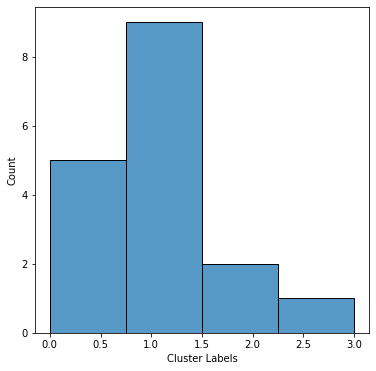

In [15]:
plt.figure(figsize=(6, 6))
sns.histplot(df_kliniks["Cluster Labels"], bins=4)

In [16]:
df_klinikClusters=df_kliniks['Cluster Labels'].value_counts().to_frame()
df_klinikClusters

,Cluster Labels
1,9
0,5
2,2
3,1


In [17]:
df_klinikClusters.index=["2.Group","1.Group","3.Group","4.Group"]

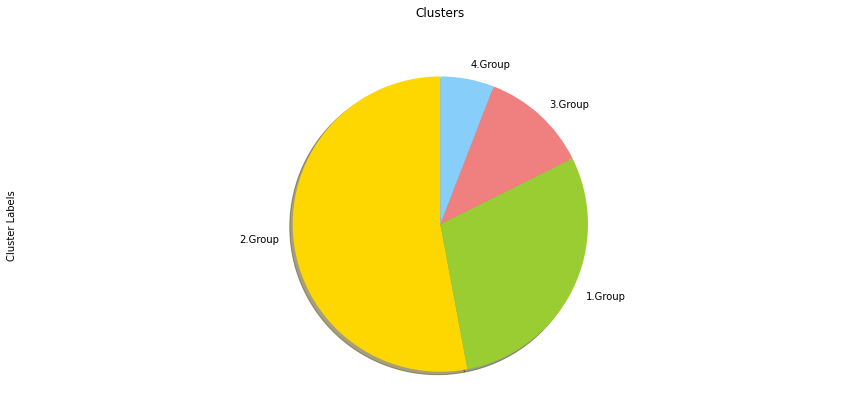

In [18]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode_list = [0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.

df_klinikClusters['Cluster Labels'].plot(kind='pie',
                            figsize=(15, 6),
                             
                            startangle=90,    
                            shadow=True,       
                                     # turn off labels on pie chart
                            pctdistance=1.1,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Clusters', y=1.12) 

plt.axis('equal') 

# add legend
#plt.legend(labels=df_gesamt.index, loc='upper left') 

plt.show()

In [19]:
df_kliniks.sort_values('Cluster Labels')

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl,Cluster Labels
8,Klinik am Zuckerberg,0.472796,91.350649,90.922078,92.649351,89.649351,90.090909,11,77,0
13,Krankenhaus Winsen,0.211417,59.674419,61.627907,69.383721,60.127907,58.953488,14,86,0
15,Sophienklinik,0.287036,61.922078,64.961039,74.506494,62.831169,56.311688,10,77,0
16,St. Martini Krankenhaus,0.395636,74.111111,76.761905,80.460317,73.650794,68.365079,14,63,0
3,Eilenriede Klinik Hannover,0.449850,84.367347,85.040816,86.408163,87.816327,81.000000,8,49,0
4,HELIOS Klinik Cuxhaven,0.261306,56.910569,59.349593,63.959350,56.130081,57.219512,14,123,1
5,Helios Kliniken Mittelweser,0.256709,54.572581,56.185484,59.403226,55.693548,57.580645,18,124,1
6,Herzogin Elisabeth Hospital,0.371762,79.179688,78.414062,81.773438,75.835938,75.335938,12,128,1
7,KRH Klinikum Agness Karll Laatzen,0.184622,48.610169,57.076271,64.135593,50.635593,41.855932,16,118,1
9,Klinikum Peine,0.275747,62.317241,67.379310,71.282759,64.634483,55.924138,18,145,1


<h1 align=center><font size = 4, color = blue>Gruppen</font></h1>

In [20]:
df_kliniks[df_kliniks["Cluster Labels"]==0]

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl,Cluster Labels
3,Eilenriede Klinik Hannover,0.449850,84.367347,85.040816,86.408163,87.816327,81.000000,8,49,0
8,Klinik am Zuckerberg,0.472796,91.350649,90.922078,92.649351,89.649351,90.090909,11,77,0
13,Krankenhaus Winsen,0.211417,59.674419,61.627907,69.383721,60.127907,58.953488,14,86,0
15,Sophienklinik,0.287036,61.922078,64.961039,74.506494,62.831169,56.311688,10,77,0
16,St. Martini Krankenhaus,0.395636,74.111111,76.761905,80.460317,73.650794,68.365079,14,63,0


In [21]:
df_kliniks[df_kliniks["Cluster Labels"]==0].groupby(['Cluster Labels'],as_index=False).mean()

,Cluster Labels,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl
0,0,0.363347,74.285121,75.862749,80.681609,74.815109,70.944233,11.4,70.4


In [22]:
df_kliniks.describe().loc['mean']

Polaritiy           0.260409
Gesamt             59.878598
Qualität           62.746594
Behandlung         66.168936
Verwaltung         59.654169
Ausstattung        58.507577
Fach_arten         12.764706
Rezension_zahl    121.058824
Cluster Labels      0.941176
Name: mean, dtype: float64

### Gruppe-1: 
 - Hohes Like-Level
 - Geringe Popularität

In [23]:
df_kliniks[df_kliniks["Cluster Labels"]==1]

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl,Cluster Labels
0,AMEOS Klinikum Hildesheim,0.070400,34.319767,37.581395,33.337209,34.116279,32.610465,6,172,1
1,AMEOS Klinikum Seepark Geestland,0.274780,70.861111,74.555556,76.173611,69.034722,66.701389,7,144,1
4,HELIOS Klinik Cuxhaven,0.261306,56.910569,59.349593,63.959350,56.130081,57.219512,14,123,1
5,Helios Kliniken Mittelweser,0.256709,54.572581,56.185484,59.403226,55.693548,57.580645,18,124,1
6,Herzogin Elisabeth Hospital,0.371762,79.179688,78.414062,81.773438,75.835938,75.335938,12,128,1
7,KRH Klinikum Agness Karll Laatzen,0.184622,48.610169,57.076271,64.135593,50.635593,41.855932,16,118,1
9,Klinikum Peine,0.275747,62.317241,67.379310,71.282759,64.634483,55.924138,18,145,1
10,Klinikum Wahrendorff,0.165236,45.723810,47.295238,43.847619,46.990476,51.438095,4,105,1
12,Krankenhaus Buchholz,0.218212,45.631148,51.368852,55.204918,49.754098,46.500000,17,122,1


In [24]:
df_kliniks[df_kliniks["Cluster Labels"]==1].groupby(['Cluster Labels'],as_index=False).mean()

,Cluster Labels,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl
0,1,0.230975,55.347343,58.80064,61.01308,55.869469,53.907346,12.444444,131.222222


In [25]:
df_kliniks.describe().loc['mean']

Polaritiy           0.260409
Gesamt             59.878598
Qualität           62.746594
Behandlung         66.168936
Verwaltung         59.654169
Ausstattung        58.507577
Fach_arten         12.764706
Rezension_zahl    121.058824
Cluster Labels      0.941176
Name: mean, dtype: float64

## Gruppe-2: 
- Durchschnittliche Like-Level
- Durchschnittliche Popularität

In [26]:
df_kliniks[df_kliniks["Cluster Labels"]==2]

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl,Cluster Labels
2,DIAKOVERE Henriettenstift,0.235991,60.165975,65.157676,69.854772,55.095436,62.414938,25,241,2
11,Klinikum Wolfsburg,0.215484,58.064655,62.245690,67.241379,51.336207,58.961207,19,232,2


In [27]:
df_kliniks[df_kliniks["Cluster Labels"]==2].groupby(['Cluster Labels'],as_index=False).mean()

,Cluster Labels,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl
0,2,0.225737,59.115315,63.701683,68.548076,53.215821,60.688072,22.0,236.5


In [28]:
df_kliniks.describe().loc['mean']

Polaritiy           0.260409
Gesamt             59.878598
Qualität           62.746594
Behandlung         66.168936
Verwaltung         59.654169
Ausstattung        58.507577
Fach_arten         12.764706
Rezension_zahl    121.058824
Cluster Labels      0.941176
Name: mean, dtype: float64

### Gruppe-3: 
- Durchschnittliche Like-Level
- Hoche Popularität

In [29]:
df_kliniks[df_kliniks["Cluster Labels"]==3]

,Name der Klinik,Polaritiy,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,Fach_arten,Rezension_zahl,Cluster Labels
14,Psychiatrische Klinik Lüneburg,0.079971,30.153846,30.769231,35.25,30.788462,33.365385,4,52,3


In [30]:
df_kliniks.describe().loc['mean']

Polaritiy           0.260409
Gesamt             59.878598
Qualität           62.746594
Behandlung         66.168936
Verwaltung         59.654169
Ausstattung        58.507577
Fach_arten         12.764706
Rezension_zahl    121.058824
Cluster Labels      0.941176
Name: mean, dtype: float64

### Gruppe-4: 
 - Niedriges Like-Level
 - Niedrige Popularität 

## Hinzufügen von Gruppenlabels zum Dataset

### Google Dataset

In [31]:
klinik_bewertungen_google_afterModeling=pd.read_csv("../Exploratory Data Analysis/GoogleMaps/klinik_bewertungen_google_afterAnalysis.csv")

In [32]:
klinik_bewertungen_google_afterModeling.groupby(['Name der Klinik'],as_index=False).mean()["Name der Klinik"].to_list()

['AMEOS Klinikum Hildesheim',
 'AMEOS Klinikum Seepark Geestland',
 'DIAKOVERE Henriettenstift',
 'Eilenriede Klinik Hannover',
 'HELIOS Klinik Cuxhaven',
 'Helios Kliniken Mittelweser',
 'Herzogin Elisabeth Hospital',
 'KRH Klinikum Agnes Karll Laatzen',
 'Klinik Am Zuckerberg GmbH',
 'Klinikum Peine gGmbH',
 'Klinikum Wahrendorff',
 'Klinikum Wolfsburg in Wolfsburg',
 'Krankenhaus Buchholz',
 'Krankenhaus Winsen',
 'Psychiatrische Klinik Lüneburg',
 'Sophienklinik GmbH',
 'St. Martini Krankenhaus']

In [33]:
klinik_cluster_df=df_kliniks[["Name der Klinik","Cluster Labels"]]
klinik_cluster_df["Name der Klinik"]=klinik_bewertungen_google_afterModeling.groupby(['Name der Klinik'],as_index=False).mean()["Name der Klinik"].to_list()
klinik_cluster_df


<ipython-input-33-5f4ffd6a3ef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klinik_cluster_df["Name der Klinik"]=klinik_bewertungen_google_afterModeling.groupby(['Name der Klinik'],as_index=False).mean()["Name der Klinik"].to_list()


,Name der Klinik,Cluster Labels
0,AMEOS Klinikum Hildesheim,1
1,AMEOS Klinikum Seepark Geestland,1
2,DIAKOVERE Henriettenstift,2
3,Eilenriede Klinik Hannover,0
4,HELIOS Klinik Cuxhaven,1
5,Helios Kliniken Mittelweser,1
6,Herzogin Elisabeth Hospital,1
7,KRH Klinikum Agnes Karll Laatzen,1
8,Klinik Am Zuckerberg GmbH,0
9,Klinikum Peine gGmbH,1


In [34]:
klinik_cluster_df.iloc[15,0]

'Sophienklinik GmbH'

In [35]:

klinik_name_list=klinik_bewertungen_google_afterModeling["Name der Klinik"].to_list()
cluster=[]

for i in range(len(klinik_bewertungen_google_afterModeling["Name der Klinik"].to_list())):
    added=False
    for j in range(17):
        if klinik_name_list[i]==klinik_cluster_df.iloc[j,0]:
            added=True
            cluster.append(klinik_cluster_df.iloc[j,1])
    if not added:
        print(klinik_name_list[i])
        


In [36]:
klinik_bewertungen_google_afterModeling["Gruppe"]=cluster
klinik_bewertungen_google_afterModeling

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive,Gruppe
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0,1
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1,1
2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1,1
3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1,1
4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0,1
...,...,...,...,...,...,...,...,...,...
1482,Psychiatrische Klinik Lüneburg,Ratiopharms Rache... leicht anmaßende Azubis u...,1,1.000000,0.0,2017,1,1,3
1483,Psychiatrische Klinik Lüneburg,Es war schlimm,1,-1.000000,0.0,2019,0,0,3
1484,Psychiatrische Klinik Lüneburg,Menschenunwürdig,1,-1.000000,0.0,2019,0,0,3
1485,Psychiatrische Klinik Lüneburg,Nicht gute Mitarbeiter,3,-0.500000,0.0,2016,0,0,3


In [37]:
#klinik_bewertungen_google_afterModeling.to_csv('klinik_bewertungen_google_afterModeling.csv', index=False)

### KlinikbewertungenDe Dataset

In [38]:
klinik_bewertungen_afterModeling=pd.read_csv("../Exploratory Data Analysis/KlinikBewertungen/klinik_bewertungen_afterAnalysis.csv")

In [39]:
klinik_cluster_df=df_kliniks[["Name der Klinik","Cluster Labels"]]

In [40]:

klinik_name_list=klinik_bewertungen_afterModeling["Name der Klinik"].to_list()
cluster=[]

for i in range(len(klinik_bewertungen_afterModeling["Name der Klinik"].to_list())):
    added=False
    for j in range(17):
        if klinik_name_list[i]==klinik_cluster_df.iloc[j,0]:
            added=True
            cluster.append(klinik_cluster_df.iloc[j,1])
    if not added:
        print(klinik_name_list[i])
        


In [41]:
klinik_bewertungen_afterModeling["Gruppe"]=cluster
klinik_bewertungen_afterModeling

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive,Gruppe
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.000000,2021,6,7,100.0,100.0,100.0,100.0,100.0,1,1
1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.000000,2021,5,25,100.0,100.0,100.0,100.0,67.0,1,1
2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.000000,2021,5,11,100.0,100.0,100.0,100.0,100.0,1,1
3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.000000,2021,5,9,100.0,100.0,100.0,67.0,100.0,1,1
4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.000000,2021,5,7,100.0,100.0,100.0,100.0,67.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Psychiatrische Klinik Lüneburg,Hilft nur in Krisen!,2013-07-23,Kind/Jugend-Psych.,Ich war in 2 verschiedenen Häusern. (ehm.) Hau...,0.333333,0.000000,2013,7,23,33.0,33.0,67.0,0.0,33.0,1,3
2054,Psychiatrische Klinik Lüneburg,Mir gings schlechter als vorher,2013-03-19,Psychiatrie,Ich war vor kuzen Patientrin auf der Station 1...,0.115833,0.050000,2013,3,19,0.0,0.0,0.0,0.0,0.0,1,3
2055,Psychiatrische Klinik Lüneburg,Eine positive Überraschung!,2009-12-05,Psychiatrie,Ich befinde mich seit einigen Wochen in Behand...,0.611333,0.066667,2009,12,5,100.0,100.0,67.0,100.0,100.0,1,3
2056,Psychiatrische Klinik Lüneburg,Tagesklinik Uelzener Straße,2009-10-25,Psychiatrie,Ich kann mich Angie nur anschließen! Diese Tag...,-0.175000,0.083333,2009,10,25,0.0,0.0,0.0,0.0,0.0,0,3


In [42]:
#klinik_bewertungen_afterModeling.to_csv('klinik_bewertungen_afterModeling.csv', index=False)

## Hinzufügen einer Indexspalte

### Google Dataset

In [43]:
klinik_bewertungen_google_afterModeling.head(1)

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive,Gruppe
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0,1


In [44]:
klinik_bewertungen_google_afterModeling['index'] = klinik_bewertungen_google_afterModeling.index
klinik_bewertungen_google_afterModeling

,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive,Gruppe,index
0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0,1,0
1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1,1,1
2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1,1,2
3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1,1,3
4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...
1482,Psychiatrische Klinik Lüneburg,Ratiopharms Rache... leicht anmaßende Azubis u...,1,1.000000,0.0,2017,1,1,3,1482
1483,Psychiatrische Klinik Lüneburg,Es war schlimm,1,-1.000000,0.0,2019,0,0,3,1483
1484,Psychiatrische Klinik Lüneburg,Menschenunwürdig,1,-1.000000,0.0,2019,0,0,3,1484
1485,Psychiatrische Klinik Lüneburg,Nicht gute Mitarbeiter,3,-0.500000,0.0,2016,0,0,3,1485


In [45]:
new_cols= ['index','Name der Klinik', 'Textuelle Bewertung', 'Sternebewertung',
       'Polaritiy', 'Subjectivity', 'year', 'Likes', 'positive', 'Gruppe' ]

In [46]:
klinik_bewertungen_google_afterModeling = klinik_bewertungen_google_afterModeling.reindex(columns=new_cols)
klinik_bewertungen_google_afterModeling

,index,Name der Klinik,Textuelle Bewertung,Sternebewertung,Polaritiy,Subjectivity,year,Likes,positive,Gruppe
0,0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0,1
1,1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1,1
2,2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1,1
3,3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1,1
4,4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1482,1482,Psychiatrische Klinik Lüneburg,Ratiopharms Rache... leicht anmaßende Azubis u...,1,1.000000,0.0,2017,1,1,3
1483,1483,Psychiatrische Klinik Lüneburg,Es war schlimm,1,-1.000000,0.0,2019,0,0,3
1484,1484,Psychiatrische Klinik Lüneburg,Menschenunwürdig,1,-1.000000,0.0,2019,0,0,3
1485,1485,Psychiatrische Klinik Lüneburg,Nicht gute Mitarbeiter,3,-0.500000,0.0,2016,0,0,3


### KlinikbewertungenDe Dataset

In [47]:
klinik_bewertungen_afterModeling.head(1)

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive,Gruppe
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.0,0.0,2021,6,7,100.0,100.0,100.0,100.0,100.0,1,1


In [48]:
klinik_bewertungen_afterModeling['index'] = klinik_bewertungen_afterModeling.index
klinik_bewertungen_afterModeling

,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive,Gruppe,index
0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.000000,2021,6,7,100.0,100.0,100.0,100.0,100.0,1,1,0
1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.000000,2021,5,25,100.0,100.0,100.0,100.0,67.0,1,1,1
2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.000000,2021,5,11,100.0,100.0,100.0,100.0,100.0,1,1,2
3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.000000,2021,5,9,100.0,100.0,100.0,67.0,100.0,1,1,3
4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.000000,2021,5,7,100.0,100.0,100.0,100.0,67.0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Psychiatrische Klinik Lüneburg,Hilft nur in Krisen!,2013-07-23,Kind/Jugend-Psych.,Ich war in 2 verschiedenen Häusern. (ehm.) Hau...,0.333333,0.000000,2013,7,23,33.0,33.0,67.0,0.0,33.0,1,3,2053
2054,Psychiatrische Klinik Lüneburg,Mir gings schlechter als vorher,2013-03-19,Psychiatrie,Ich war vor kuzen Patientrin auf der Station 1...,0.115833,0.050000,2013,3,19,0.0,0.0,0.0,0.0,0.0,1,3,2054
2055,Psychiatrische Klinik Lüneburg,Eine positive Überraschung!,2009-12-05,Psychiatrie,Ich befinde mich seit einigen Wochen in Behand...,0.611333,0.066667,2009,12,5,100.0,100.0,67.0,100.0,100.0,1,3,2055
2056,Psychiatrische Klinik Lüneburg,Tagesklinik Uelzener Straße,2009-10-25,Psychiatrie,Ich kann mich Angie nur anschließen! Diese Tag...,-0.175000,0.083333,2009,10,25,0.0,0.0,0.0,0.0,0.0,0,3,2056


In [49]:
new_cols= ['index','Name der Klinik', 'Titel', 'Datum', 'Fachbereich',
       'Erfahrungsbericht', 'Polaritiy', 'Subjectivity', 'year', 'month',
       'day', 'Gesamt', 'Qualität', 'Behandlung', 'Verwaltung',
       'Ausstattung', 'positive', 'Gruppe' ]


In [50]:
klinik_bewertungen_afterModeling = klinik_bewertungen_afterModeling.reindex(columns=new_cols)
klinik_bewertungen_afterModeling

,index,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive,Gruppe
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.000000,2021,6,7,100.0,100.0,100.0,100.0,100.0,1,1
1,1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.000000,2021,5,25,100.0,100.0,100.0,100.0,67.0,1,1
2,2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.000000,2021,5,11,100.0,100.0,100.0,100.0,100.0,1,1
3,3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.000000,2021,5,9,100.0,100.0,100.0,67.0,100.0,1,1
4,4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.000000,2021,5,7,100.0,100.0,100.0,100.0,67.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2053,Psychiatrische Klinik Lüneburg,Hilft nur in Krisen!,2013-07-23,Kind/Jugend-Psych.,Ich war in 2 verschiedenen Häusern. (ehm.) Hau...,0.333333,0.000000,2013,7,23,33.0,33.0,67.0,0.0,33.0,1,3
2054,2054,Psychiatrische Klinik Lüneburg,Mir gings schlechter als vorher,2013-03-19,Psychiatrie,Ich war vor kuzen Patientrin auf der Station 1...,0.115833,0.050000,2013,3,19,0.0,0.0,0.0,0.0,0.0,1,3
2055,2055,Psychiatrische Klinik Lüneburg,Eine positive Überraschung!,2009-12-05,Psychiatrie,Ich befinde mich seit einigen Wochen in Behand...,0.611333,0.066667,2009,12,5,100.0,100.0,67.0,100.0,100.0,1,3
2056,2056,Psychiatrische Klinik Lüneburg,Tagesklinik Uelzener Straße,2009-10-25,Psychiatrie,Ich kann mich Angie nur anschließen! Diese Tag...,-0.175000,0.083333,2009,10,25,0.0,0.0,0.0,0.0,0.0,0,3


## Spaltennamen bearbeiten

### KlinikbewertungenDe Dataset

In [51]:
klinik_bewertungen_afterModeling=klinik_bewertungen_afterModeling.rename({'Name der Klinik':'Name'}, axis='columns')
klinik_bewertungen_afterModeling

,index,Name,Titel,Datum,Fachbereich,Erfahrungsbericht,Polaritiy,Subjectivity,year,month,day,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung,positive,Gruppe
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.000000,2021,6,7,100.0,100.0,100.0,100.0,100.0,1,1
1,1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.000000,2021,5,25,100.0,100.0,100.0,100.0,67.0,1,1
2,2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.000000,2021,5,11,100.0,100.0,100.0,100.0,100.0,1,1
3,3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.000000,2021,5,9,100.0,100.0,100.0,67.0,100.0,1,1
4,4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.000000,2021,5,7,100.0,100.0,100.0,100.0,67.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2053,Psychiatrische Klinik Lüneburg,Hilft nur in Krisen!,2013-07-23,Kind/Jugend-Psych.,Ich war in 2 verschiedenen Häusern. (ehm.) Hau...,0.333333,0.000000,2013,7,23,33.0,33.0,67.0,0.0,33.0,1,3
2054,2054,Psychiatrische Klinik Lüneburg,Mir gings schlechter als vorher,2013-03-19,Psychiatrie,Ich war vor kuzen Patientrin auf der Station 1...,0.115833,0.050000,2013,3,19,0.0,0.0,0.0,0.0,0.0,1,3
2055,2055,Psychiatrische Klinik Lüneburg,Eine positive Überraschung!,2009-12-05,Psychiatrie,Ich befinde mich seit einigen Wochen in Behand...,0.611333,0.066667,2009,12,5,100.0,100.0,67.0,100.0,100.0,1,3
2056,2056,Psychiatrische Klinik Lüneburg,Tagesklinik Uelzener Straße,2009-10-25,Psychiatrie,Ich kann mich Angie nur anschließen! Diese Tag...,-0.175000,0.083333,2009,10,25,0.0,0.0,0.0,0.0,0.0,0,3


In [52]:
klinik_bewertungen_afterModeling=klinik_bewertungen_afterModeling.rename({'Name':'name','Titel':'titel','Datum':'datum','Fachbereich':'fachbereich','Erfahrungsbericht':'komment', 'Polaritiy':'polarity','Subjectivity':'subjectivity','Gesamt':'gesamt',
       'Qualität':'qualität', 'Behandlung':'behandlung', 'Verwaltung':'verwaltung', 'Ausstattung':'ausstattung','Gruppe':'group'}, axis='columns')
klinik_bewertungen_afterModeling

,index,name,titel,datum,fachbereich,komment,polarity,subjectivity,year,month,day,gesamt,qualität,behandlung,verwaltung,ausstattung,positive,group
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.000000,2021,6,7,100.0,100.0,100.0,100.0,100.0,1,1
1,1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.000000,2021,5,25,100.0,100.0,100.0,100.0,67.0,1,1
2,2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.000000,2021,5,11,100.0,100.0,100.0,100.0,100.0,1,1
3,3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.000000,2021,5,9,100.0,100.0,100.0,67.0,100.0,1,1
4,4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.000000,2021,5,7,100.0,100.0,100.0,100.0,67.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2053,Psychiatrische Klinik Lüneburg,Hilft nur in Krisen!,2013-07-23,Kind/Jugend-Psych.,Ich war in 2 verschiedenen Häusern. (ehm.) Hau...,0.333333,0.000000,2013,7,23,33.0,33.0,67.0,0.0,33.0,1,3
2054,2054,Psychiatrische Klinik Lüneburg,Mir gings schlechter als vorher,2013-03-19,Psychiatrie,Ich war vor kuzen Patientrin auf der Station 1...,0.115833,0.050000,2013,3,19,0.0,0.0,0.0,0.0,0.0,1,3
2055,2055,Psychiatrische Klinik Lüneburg,Eine positive Überraschung!,2009-12-05,Psychiatrie,Ich befinde mich seit einigen Wochen in Behand...,0.611333,0.066667,2009,12,5,100.0,100.0,67.0,100.0,100.0,1,3
2056,2056,Psychiatrische Klinik Lüneburg,Tagesklinik Uelzener Straße,2009-10-25,Psychiatrie,Ich kann mich Angie nur anschließen! Diese Tag...,-0.175000,0.083333,2009,10,25,0.0,0.0,0.0,0.0,0.0,0,3


### Google Dataset

In [53]:
klinik_bewertungen_google_afterModeling=klinik_bewertungen_google_afterModeling.rename({'Name der Klinik':'name','Textuelle Bewertung':'komment','Sternebewertung':'sterne', 'Polaritiy':'polarity','Subjectivity':'subjectivity','Likes':'likes','Gruppe':'group'}, axis='columns')
klinik_bewertungen_google_afterModeling


,index,name,komment,sterne,polarity,subjectivity,year,likes,positive,group
0,0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0,1
1,1,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1,1
2,2,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1,1
3,3,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1,1
4,4,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1482,1482,Psychiatrische Klinik Lüneburg,Ratiopharms Rache... leicht anmaßende Azubis u...,1,1.000000,0.0,2017,1,1,3
1483,1483,Psychiatrische Klinik Lüneburg,Es war schlimm,1,-1.000000,0.0,2019,0,0,3
1484,1484,Psychiatrische Klinik Lüneburg,Menschenunwürdig,1,-1.000000,0.0,2019,0,0,3
1485,1485,Psychiatrische Klinik Lüneburg,Nicht gute Mitarbeiter,3,-0.500000,0.0,2016,0,0,3


## Merge Datasets

### Spaltennamen standardisieren

### KlinikbewertungenDe Dataset

In [54]:
klinik_bewertungen_afterModeling["sterne"]=[None for i in range(2058)]

In [55]:
klinik_bewertungen_afterModeling["likes"]=[None for i in range(2058)]

In [56]:
klinik_bewertungen_afterModeling["source"]=['klinikDe' for i in range(2058)]

In [57]:
klinik_bewertungen_afterModeling.head(1)

,index,name,titel,datum,fachbereich,komment,polarity,subjectivity,year,month,...,gesamt,qualität,behandlung,verwaltung,ausstattung,positive,group,sterne,likes,source
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.0,0.0,2021,6,...,100.0,100.0,100.0,100.0,100.0,1,1,None,None,klinikDe


### Google Dataset

In [58]:
klinik_bewertungen_google_afterModeling["titel"]=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['datum']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['fachbereich']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['month']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['day']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['gesamt']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['qualität']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['behandlung']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['verwaltung']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling['ausstattung']=[None for i in range(1487)]
klinik_bewertungen_google_afterModeling["source"]=['googleMaps' for i in range(1487)]

In [59]:
klinik_bewertungen_google_afterModeling.head(1)

,index,name,komment,sterne,polarity,subjectivity,year,likes,positive,group,...,datum,fachbereich,month,day,gesamt,qualität,behandlung,verwaltung,ausstattung,source
0,0,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0,1,...,None,None,None,None,None,None,None,None,None,googleMaps


In [60]:
#change index column for merge
klinik_bewertungen_google_afterModeling['index']=[i for i in range (2058,3545)]

In [61]:
klinik_bewertungen_google_afterModeling.columns

Index(['index', 'name', 'komment', 'sterne', 'polarity', 'subjectivity',
       'year', 'likes', 'positive', 'group', 'titel', 'datum', 'fachbereich',
       'month', 'day', 'gesamt', 'qualität', 'behandlung', 'verwaltung',
       'ausstattung', 'source'],
      dtype='object')

In [62]:
klinik_bewertungen_afterModeling.columns

Index(['index', 'name', 'titel', 'datum', 'fachbereich', 'komment', 'polarity',
       'subjectivity', 'year', 'month', 'day', 'gesamt', 'qualität',
       'behandlung', 'verwaltung', 'ausstattung', 'positive', 'group',
       'sterne', 'likes', 'source'],
      dtype='object')

In [63]:
df1=klinik_bewertungen_google_afterModeling
df1

,index,name,komment,sterne,polarity,subjectivity,year,likes,positive,group,...,datum,fachbereich,month,day,gesamt,qualität,behandlung,verwaltung,ausstattung,source
0,2058,Herzogin Elisabeth Hospital,Vor der Corona Pandemie hätte ich jeden zugest...,2,0.283333,0.0,2021,1,0,1,...,None,None,None,None,None,None,None,None,None,googleMaps
1,2059,Herzogin Elisabeth Hospital,"Tolles Krankenhaus, trotzdem bin ich lieber g...",4,0.500000,0.0,2020,1,1,1,...,None,None,None,None,None,None,None,None,None,googleMaps
2,2060,Herzogin Elisabeth Hospital,"Lungenembolie!**Ein Tag ITS, phantastische Für...",5,0.333333,0.0,2021,1,1,1,...,None,None,None,None,None,None,None,None,None,googleMaps
3,2061,Herzogin Elisabeth Hospital,Alles sehr gut. Volle Punktzahl!,5,0.500000,0.0,2018,4,1,1,...,None,None,None,None,None,None,None,None,None,googleMaps
4,2062,Herzogin Elisabeth Hospital,Ich werde nie wieder in ein anderes Krankenhau...,5,0.212500,0.0,2021,1,0,1,...,None,None,None,None,None,None,None,None,None,googleMaps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,3540,Psychiatrische Klinik Lüneburg,Ratiopharms Rache... leicht anmaßende Azubis u...,1,1.000000,0.0,2017,1,1,3,...,None,None,None,None,None,None,None,None,None,googleMaps
1483,3541,Psychiatrische Klinik Lüneburg,Es war schlimm,1,-1.000000,0.0,2019,0,0,3,...,None,None,None,None,None,None,None,None,None,googleMaps
1484,3542,Psychiatrische Klinik Lüneburg,Menschenunwürdig,1,-1.000000,0.0,2019,0,0,3,...,None,None,None,None,None,None,None,None,None,googleMaps
1485,3543,Psychiatrische Klinik Lüneburg,Nicht gute Mitarbeiter,3,-0.500000,0.0,2016,0,0,3,...,None,None,None,None,None,None,None,None,None,googleMaps


In [64]:
df2=klinik_bewertungen_afterModeling
df2

,index,name,titel,datum,fachbereich,komment,polarity,subjectivity,year,month,...,gesamt,qualität,behandlung,verwaltung,ausstattung,positive,group,sterne,likes,source
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.000000,2021,6,...,100.0,100.0,100.0,100.0,100.0,1,1,None,None,klinikDe
1,1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.000000,2021,5,...,100.0,100.0,100.0,100.0,67.0,1,1,None,None,klinikDe
2,2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.000000,2021,5,...,100.0,100.0,100.0,100.0,100.0,1,1,None,None,klinikDe
3,3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.000000,2021,5,...,100.0,100.0,100.0,67.0,100.0,1,1,None,None,klinikDe
4,4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.000000,2021,5,...,100.0,100.0,100.0,100.0,67.0,1,1,None,None,klinikDe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2053,Psychiatrische Klinik Lüneburg,Hilft nur in Krisen!,2013-07-23,Kind/Jugend-Psych.,Ich war in 2 verschiedenen Häusern. (ehm.) Hau...,0.333333,0.000000,2013,7,...,33.0,33.0,67.0,0.0,33.0,1,3,None,None,klinikDe
2054,2054,Psychiatrische Klinik Lüneburg,Mir gings schlechter als vorher,2013-03-19,Psychiatrie,Ich war vor kuzen Patientrin auf der Station 1...,0.115833,0.050000,2013,3,...,0.0,0.0,0.0,0.0,0.0,1,3,None,None,klinikDe
2055,2055,Psychiatrische Klinik Lüneburg,Eine positive Überraschung!,2009-12-05,Psychiatrie,Ich befinde mich seit einigen Wochen in Behand...,0.611333,0.066667,2009,12,...,100.0,100.0,67.0,100.0,100.0,1,3,None,None,klinikDe
2056,2056,Psychiatrische Klinik Lüneburg,Tagesklinik Uelzener Straße,2009-10-25,Psychiatrie,Ich kann mich Angie nur anschließen! Diese Tag...,-0.175000,0.083333,2009,10,...,0.0,0.0,0.0,0.0,0.0,0,3,None,None,klinikDe


In [65]:
concated_df=pd.concat([df2, df1])

In [75]:
concated_df

,index,name,titel,datum,fachbereich,komment,polarity,subjectivity,year,month,...,gesamt,qualität,behandlung,verwaltung,ausstattung,positive,group,sterne,likes,source
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.0,2021,6,...,100,100,100,100,100,1,1,None,None,klinikDe
1,1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.0,2021,5,...,100,100,100,100,67,1,1,None,None,klinikDe
2,2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.0,2021,5,...,100,100,100,100,100,1,1,None,None,klinikDe
3,3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.0,2021,5,...,100,100,100,67,100,1,1,None,None,klinikDe
4,4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.0,2021,5,...,100,100,100,100,67,1,1,None,None,klinikDe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,3540,Psychiatrische Klinik Lüneburg,None,None,None,Ratiopharms Rache... leicht anmaßende Azubis u...,1.000000,0.0,2017,None,...,None,None,None,None,None,1,3,1,1,googleMaps
1483,3541,Psychiatrische Klinik Lüneburg,None,None,None,Es war schlimm,-1.000000,0.0,2019,None,...,None,None,None,None,None,0,3,1,0,googleMaps
1484,3542,Psychiatrische Klinik Lüneburg,None,None,None,Menschenunwürdig,-1.000000,0.0,2019,None,...,None,None,None,None,None,0,3,1,0,googleMaps
1485,3543,Psychiatrische Klinik Lüneburg,None,None,None,Nicht gute Mitarbeiter,-0.500000,0.0,2016,None,...,None,None,None,None,None,0,3,3,0,googleMaps


In [76]:
concated_df.index=concated_df['index']

In [77]:
concated_df

,index,name,titel,datum,fachbereich,komment,polarity,subjectivity,year,month,...,gesamt,qualität,behandlung,verwaltung,ausstattung,positive,group,sterne,likes,source
index,,,,,,,,,,,,,,,,,,,,,
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.0,2021,6,...,100,100,100,100,100,1,1,None,None,klinikDe
1,1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.0,2021,5,...,100,100,100,100,67,1,1,None,None,klinikDe
2,2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.0,2021,5,...,100,100,100,100,100,1,1,None,None,klinikDe
3,3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.0,2021,5,...,100,100,100,67,100,1,1,None,None,klinikDe
4,4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.0,2021,5,...,100,100,100,100,67,1,1,None,None,klinikDe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,3540,Psychiatrische Klinik Lüneburg,None,None,None,Ratiopharms Rache... leicht anmaßende Azubis u...,1.000000,0.0,2017,None,...,None,None,None,None,None,1,3,1,1,googleMaps
3541,3541,Psychiatrische Klinik Lüneburg,None,None,None,Es war schlimm,-1.000000,0.0,2019,None,...,None,None,None,None,None,0,3,1,0,googleMaps
3542,3542,Psychiatrische Klinik Lüneburg,None,None,None,Menschenunwürdig,-1.000000,0.0,2019,None,...,None,None,None,None,None,0,3,1,0,googleMaps


In [78]:
concated_df.shape

(3545, 21)

In [104]:
concated_df['name'][:2058].unique()

array(['Herzogin Elisabeth Hospital', 'Klinik am Zuckerberg',
       'Klinikum Wolfsburg', 'Klinikum Peine', 'St. Martini Krankenhaus',
       'DIAKOVERE Henriettenstift', 'Eilenriede Klinik Hannover',
       'Sophienklinik', 'KRH Klinikum Agness Karll Laatzen',
       'Klinikum Wahrendorff', 'AMEOS Klinikum Hildesheim',
       'Helios Kliniken Mittelweser', 'HELIOS Klinik Cuxhaven',
       'AMEOS Klinikum Seepark Geestland', 'Krankenhaus Buchholz',
       'Krankenhaus Winsen', 'Psychiatrische Klinik Lüneburg'],
      dtype=object)

In [105]:
concated_df['name'][2058:3345].unique()

array(['Herzogin Elisabeth Hospital', 'Klinik Am Zuckerberg GmbH',
       'Klinikum Wolfsburg in Wolfsburg', 'Klinikum Peine gGmbH',
       'St. Martini Krankenhaus', 'DIAKOVERE Henriettenstift',
       'Eilenriede Klinik Hannover', 'Sophienklinik GmbH',
       'KRH Klinikum Agnes Karll Laatzen', 'Klinikum Wahrendorff',
       'AMEOS Klinikum Hildesheim', 'Helios Kliniken Mittelweser',
       'HELIOS Klinik Cuxhaven', 'AMEOS Klinikum Seepark Geestland',
       'Krankenhaus Buchholz'], dtype=object)

In [114]:
klinik_names=concated_df['name'].to_list()
len(klinik_names)

3545

In [115]:
len(set(klinik_names))

22

In [116]:

for i in range (3545):
    if klinik_names[i]=='Sophienklinik GmbH':
        klinik_names[i]='Sophienklinik'
    if klinik_names[i]=='Klinik Am Zuckerberg GmbH':
        klinik_names[i]='Klinik am Zuckerberg'
    if klinik_names[i]=='Klinikum Wolfsburg in Wolfsburg':
        klinik_names[i]='Klinikum Wolfsburg'
        
    if klinik_names[i]=='Klinikum Peine gGmbH':
        klinik_names[i]='Klinikum Peine'
    if klinik_names[i]=='Klinik Am Zuckerberg GmbH':
        klinik_names[i]='Klinik am Zuckerberg'
    if klinik_names[i]=='KRH Klinikum Agnes Karll Laatzen':
        klinik_names[i]='KRH Klinikum Agness Karll Laatzen'        
        
        
        

        
        

In [117]:
set(klinik_names)

{'AMEOS Klinikum Hildesheim',
 'AMEOS Klinikum Seepark Geestland',
 'DIAKOVERE Henriettenstift',
 'Eilenriede Klinik Hannover',
 'HELIOS Klinik Cuxhaven',
 'Helios Kliniken Mittelweser',
 'Herzogin Elisabeth Hospital',
 'KRH Klinikum Agness Karll Laatzen',
 'Klinik am Zuckerberg',
 'Klinikum Peine',
 'Klinikum Wahrendorff',
 'Klinikum Wolfsburg',
 'Krankenhaus Buchholz',
 'Krankenhaus Winsen',
 'Psychiatrische Klinik Lüneburg',
 'Sophienklinik',
 'St. Martini Krankenhaus'}

In [118]:
concated_df['name']=klinik_names

In [119]:
len(concated_df['name'].unique())

17

In [122]:
concated_df[2400:2450]

,index,name,titel,datum,fachbereich,komment,polarity,subjectivity,year,month,...,gesamt,qualität,behandlung,verwaltung,ausstattung,positive,group,sterne,likes,source
index,,,,,,,,,,,,,,,,,,,,,
2400,2400,Klinikum Peine,None,None,None,"Sehr nettes, herzliches Personal (E02, Notaufn...",0.333333,0.000000,2020,None,...,None,None,None,None,None,1,1,5,7,googleMaps
2401,2401,Klinikum Peine,None,None,None,"Ich habe selten, in den letzten 10 Jahren so e...",0.050000,0.166667,2020,None,...,None,None,None,None,None,0,1,1,2,googleMaps
2402,2402,Klinikum Peine,None,None,None,"Ich wurde gut, wenn auch nicht Zügig behandelt.",1.000000,0.000000,2020,None,...,None,None,None,None,None,1,1,4,2,googleMaps
2403,2403,Klinikum Peine,None,None,None,Mit Verdacht auf Herzinfarkt hier sehr gut beh...,0.444444,0.000000,2020,None,...,None,None,None,None,None,1,1,5,8,googleMaps
2404,2404,Klinikum Peine,None,None,None,Hatte einen Verdacht von einer Blinddarmentzün...,0.100000,0.100000,2019,None,...,None,None,None,None,None,0,1,4,1,googleMaps
2405,2405,Klinikum Peine,None,None,None,"Tolles Team, alles gut geklappt. Chirurgie und...",1.000000,0.000000,2020,None,...,None,None,None,None,None,1,1,5,6,googleMaps
2406,2406,Klinikum Peine,None,None,None,Ich war in den letzten Wochen zu Beratungsgesp...,0.308333,0.000000,2020,None,...,None,None,None,None,None,1,1,5,1,googleMaps
2407,2407,Klinikum Peine,None,None,None,"Viel zu lange Wartezeiten, schlechtes Personal...",-0.250000,0.250000,2020,None,...,None,None,None,None,None,0,1,2,9,googleMaps
2408,2408,Klinikum Peine,None,None,None,Ich habe am 4 September ein neues Kniegelenk (...,0.421429,0.000000,2020,None,...,None,None,None,None,None,1,1,5,1,googleMaps


In [123]:
concated_df.to_csv('Dataset.csv', index=False)

End...

### Klinik by Klinik and source by source json data production

In [1]:
import pandas as pd

In [37]:
dff = pd.read_csv("Dataset.csv")
dff.head(2)

,index,name,titel,datum,fachbereich,komment,polarity,subjectivity,year,month,...,gesamt,qualität,behandlung,verwaltung,ausstattung,positive,group,sterne,likes,source
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.00,0.0,2021,6.0,...,100.0,100.0,100.0,100.0,100.0,1,1,NaN,NaN,klinikDe
1,1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.34,0.0,2021,5.0,...,100.0,100.0,100.0,100.0,67.0,1,1,NaN,NaN,klinikDe


In [3]:
dff.columns

Index(['index', 'name', 'titel', 'datum', 'fachbereich', 'komment', 'polarity',
       'subjectivity', 'year', 'month', 'day', 'gesamt', 'qualität',
       'behandlung', 'verwaltung', 'ausstattung', 'positive', 'group',
       'sterne', 'likes', 'source'],
      dtype='object')

In [4]:
dff.name.unique()

array(['Herzogin Elisabeth Hospital', 'Klinik am Zuckerberg',
       'Klinikum Wolfsburg', 'Klinikum Peine', 'St. Martini Krankenhaus',
       'DIAKOVERE Henriettenstift', 'Eilenriede Klinik Hannover',
       'Sophienklinik', 'KRH Klinikum Agness Karll Laatzen',
       'Klinikum Wahrendorff', 'AMEOS Klinikum Hildesheim',
       'Helios Kliniken Mittelweser', 'HELIOS Klinik Cuxhaven',
       'AMEOS Klinikum Seepark Geestland', 'Krankenhaus Buchholz',
       'Krankenhaus Winsen', 'Psychiatrische Klinik Lüneburg'],
      dtype=object)

In [6]:
dff.source.unique()

array(['klinikDe', 'googleMaps'], dtype=object)

In [38]:
gesamt=[]
for i in dff["gesamt"]:
    if i==100.0:
        gesamt.append("sehr zufrieden")
    elif i== 67.0:
        gesamt.append("zufrieden")
    elif i== 33.0:
        gesamt.append("weniger zufrieden")
    elif i== 0.0:
        gesamt.append("unzufrieden")
    else:
        gesamt.append("")
print(gesamt)

['sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'weniger zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'weniger zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden'

In [12]:
len(dff)

3545

In [39]:
len(gesamt)

3545

In [40]:
qualität=[]
for i in dff["qualität"]:
    if i==100.0:
        qualität.append("sehr zufrieden")
    elif i== 67.0:
        qualität.append("zufrieden")
    elif i== 33.0:
        qualität.append("weniger zufrieden")
    elif i== 0.0:
        qualität.append("unzufrieden")
    else:
        qualität.append("")
print(qualität)

['sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'weniger zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'unzufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'weniger zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'zufrieden', 

In [20]:
len(qualität)

3545

In [41]:
behandlung=[]
for i in dff["behandlung"]:
    if i==100.0:
        behandlung.append("sehr zufrieden")
    elif i== 67.0:
        behandlung.append("zufrieden")
    elif i== 33.0:
        behandlung.append("weniger zufrieden")
    elif i== 0.0:
        behandlung.append("unzufrieden")
    else:
        behandlung.append("")
print(behandlung)
print(len(behandlung))

['sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'weniger zufrieden', 'weniger zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 

In [42]:
verwaltung=[]
for i in dff["verwaltung"]:
    if i==100.0:
        verwaltung.append("sehr zufrieden")
    elif i== 67.0:
        verwaltung.append("zufrieden")
    elif i== 33.0:
        verwaltung.append("weniger zufrieden")
    elif i== 0.0:
        verwaltung.append("unzufrieden")
    else:
        verwaltung.append("")
print(verwaltung)
print(len(verwaltung))

['sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'unzufrieden', 'weniger zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'zufrieden', 'sehr zufrieden', 'weniger zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'weniger zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'weniger zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'zufrieden', 'unzufrieden', 'sehr zu

In [43]:

ausstattung=[]
for i in dff["ausstattung"]:
    if i==100.0:
        ausstattung.append("sehr zufrieden")
    elif i== 67.0:
        ausstattung.append("zufrieden")
    elif i== 33.0:
        ausstattung.append("weniger zufrieden")
    elif i== 0.0:
        ausstattung.append("unzufrieden")
    else:
        ausstattung.append("")
print(ausstattung)
print(len(ausstattung))

['sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'zufrieden', 'weniger zufrieden', 'sehr zufrieden', 'zufrieden', 'weniger zufrieden', 'sehr zufrieden', 'zufrieden', 'zufrieden', 'unzufrieden', 'sehr zufrieden', 'zufrieden', 'zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'zufrieden', 'unzufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'zufrieden', 'weniger zufrieden', 'zufrieden', 'zufrieden', 'sehr zufrieden', 'zufrieden', 'zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'zufrieden', 'zufrieden', 'sehr zufrieden', 'zufrieden', 'sehr zufrieden', 'unzufrieden', 'sehr zufrieden', 'weniger zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'sehr zufrieden', 'se

In [44]:
dff[["ausstattung"]]=ausstattung
dff[["verwaltung"]]=verwaltung
dff[["behandlung"]]=behandlung
dff[["qualität"]]=qualität
dff[["gesamt"]]=gesamt

In [45]:
dff

,index,name,titel,datum,fachbereich,komment,polarity,subjectivity,year,month,...,gesamt,qualität,behandlung,verwaltung,ausstattung,positive,group,sterne,likes,source
0,0,Herzogin Elisabeth Hospital,Superklinik,2021-06-07,Orthopädie,Bestens durchorganisiert.gutes Personal geht i...,0.000000,0.0,2021,6.0,...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,1,1,NaN,NaN,klinikDe
1,1,Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,2021-05-25,Unfallchirurgie,Bin nach einem Autounfall im HEH gewesen und h...,0.340000,0.0,2021,5.0,...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,1,1,NaN,NaN,klinikDe
2,2,Herzogin Elisabeth Hospital,Knie OP,2021-05-11,Orthopädie,Wurde bereits im Sept. 2020 am Knie operiert. ...,0.242857,0.0,2021,5.0,...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,1,1,NaN,NaN,klinikDe
3,3,Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,2021-05-09,Chirurgie,Da ich zeit meines Lebens noch nie einen Krank...,0.536111,0.0,2021,5.0,...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,sehr zufrieden,1,1,NaN,NaN,klinikDe
4,4,Herzogin Elisabeth Hospital,Superkompetent und freundlich,2021-05-07,Gefäßchirurgie,Das gesamte Personal von der Notaufnahme über ...,0.428571,0.0,2021,5.0,...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,1,1,NaN,NaN,klinikDe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,3540,Psychiatrische Klinik Lüneburg,NaN,NaN,NaN,Ratiopharms Rache... leicht anmaßende Azubis u...,1.000000,0.0,2017,NaN,...,,,,,,1,3,1.0,1.0,googleMaps
3541,3541,Psychiatrische Klinik Lüneburg,NaN,NaN,NaN,Es war schlimm,-1.000000,0.0,2019,NaN,...,,,,,,0,3,1.0,0.0,googleMaps
3542,3542,Psychiatrische Klinik Lüneburg,NaN,NaN,NaN,Menschenunwürdig,-1.000000,0.0,2019,NaN,...,,,,,,0,3,1.0,0.0,googleMaps
3543,3543,Psychiatrische Klinik Lüneburg,NaN,NaN,NaN,Nicht gute Mitarbeiter,-0.500000,0.0,2016,NaN,...,,,,,,0,3,3.0,0.0,googleMaps


In [46]:
for i in dff.name.unique():
    for j in  dff.source.unique():
        print(dff[(dff["name"]==i) & (dff["source"]==j) ])
        dff1=dff[(dff["name"]==i) & (dff["source"]==j) ]
        
        string = i+"_"+j+".json"
        raw_string = r"{}".format(string)
        
        dff1.to_json(raw_string, orient='records')
        
        #dff1.to_csv('Dataset.csv', index=False)

    

     index                         name  \
0        0  Herzogin Elisabeth Hospital   
1        1  Herzogin Elisabeth Hospital   
2        2  Herzogin Elisabeth Hospital   
3        3  Herzogin Elisabeth Hospital   
4        4  Herzogin Elisabeth Hospital   
..     ...                          ...   
123    123  Herzogin Elisabeth Hospital   
124    124  Herzogin Elisabeth Hospital   
125    125  Herzogin Elisabeth Hospital   
126    126  Herzogin Elisabeth Hospital   
127    127  Herzogin Elisabeth Hospital   

                                                 titel       datum  \
0                                          Superklinik  2021-06-07   
1                           Kranken- oder Hotelzimmer?  2021-05-25   
2                                              Knie OP  2021-05-11   
3                             Beste Erfahrungen im HEH  2021-05-09   
4                        Superkompetent und freundlich  2021-05-07   
..                                                 ...         

      index                     name titel datum fachbereich  \
2475   2475  St. Martini Krankenhaus   NaN   NaN         NaN   
2476   2476  St. Martini Krankenhaus   NaN   NaN         NaN   
2477   2477  St. Martini Krankenhaus   NaN   NaN         NaN   
2478   2478  St. Martini Krankenhaus   NaN   NaN         NaN   
2479   2479  St. Martini Krankenhaus   NaN   NaN         NaN   
2480   2480  St. Martini Krankenhaus   NaN   NaN         NaN   
2481   2481  St. Martini Krankenhaus   NaN   NaN         NaN   
2482   2482  St. Martini Krankenhaus   NaN   NaN         NaN   
2483   2483  St. Martini Krankenhaus   NaN   NaN         NaN   
2484   2484  St. Martini Krankenhaus   NaN   NaN         NaN   
2485   2485  St. Martini Krankenhaus   NaN   NaN         NaN   
2486   2486  St. Martini Krankenhaus   NaN   NaN         NaN   
2487   2487  St. Martini Krankenhaus   NaN   NaN         NaN   
2488   2488  St. Martini Krankenhaus   NaN   NaN         NaN   
2489   2489  St. Martini Krankenhaus   N

      index                               name titel datum fachbereich  \
2734   2734  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
2735   2735  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
2736   2736  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
2737   2737  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
2738   2738  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
...     ...                                ...   ...   ...         ...   
2837   2837  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
2838   2838  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
2839   2839  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
2840   2840  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   
2841   2841  KRH Klinikum Agness Karll Laatzen   NaN   NaN         NaN   

                                                komment  polarity  \
2734  Die älteren Mitarbeiter in der Notau

      index                         name  \
1407   1407  Helios Kliniken Mittelweser   
1408   1408  Helios Kliniken Mittelweser   
1409   1409  Helios Kliniken Mittelweser   
1410   1410  Helios Kliniken Mittelweser   
1411   1411  Helios Kliniken Mittelweser   
...     ...                          ...   
1526   1526  Helios Kliniken Mittelweser   
1527   1527  Helios Kliniken Mittelweser   
1528   1528  Helios Kliniken Mittelweser   
1529   1529  Helios Kliniken Mittelweser   
1530   1530  Helios Kliniken Mittelweser   

                                                  titel       datum  \
1407                          Kompetent und Fürsorglich  2021-06-09   
1408  Warum sagt man nicht ehrlich das kein Urologe ...  2021-05-22   
1409                Tolle Klinik mit zu wenig Würdigung  2021-05-15   
1410               Super Klinik! 100 % Weiterempfehlung  2021-05-11   
1411                  Kinder bekomme ich nur noch hier!  2021-04-25   
...                                          

      index                              name titel datum fachbereich  \
3197   3197  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3198   3198  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3199   3199  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3200   3200  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3201   3201  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3202   3202  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3203   3203  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3204   3204  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3205   3205  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3206   3206  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3207   3207  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3208   3208  AMEOS Klinikum Seepark Geestland   NaN   NaN         NaN   
3209   3209  AMEOS Klinikum Seepark Geestland   NaN

In [ ]:
concated_df.to_csv('Dataset.csv', index=False)

In [47]:
for i in dff.name.unique():
    for j in  dff.source.unique():
        print(dff[(dff["name"]==i) & (dff["source"]==j) ])
        dff1=dff[(dff["name"]==i) & (dff["source"]==j) ]
        
        string = i+"_"+j+".csv"
        raw_string = r"{}".format(string)
        
        #dff1.to_json(raw_string, orient='records')
        
        dff1.to_csv(raw_string, index=False)

    

     index                         name  \
0        0  Herzogin Elisabeth Hospital   
1        1  Herzogin Elisabeth Hospital   
2        2  Herzogin Elisabeth Hospital   
3        3  Herzogin Elisabeth Hospital   
4        4  Herzogin Elisabeth Hospital   
..     ...                          ...   
123    123  Herzogin Elisabeth Hospital   
124    124  Herzogin Elisabeth Hospital   
125    125  Herzogin Elisabeth Hospital   
126    126  Herzogin Elisabeth Hospital   
127    127  Herzogin Elisabeth Hospital   

                                                 titel       datum  \
0                                          Superklinik  2021-06-07   
1                           Kranken- oder Hotelzimmer?  2021-05-25   
2                                              Knie OP  2021-05-11   
3                             Beste Erfahrungen im HEH  2021-05-09   
4                        Superkompetent und freundlich  2021-05-07   
..                                                 ...         

     index                     name  \
582    582  St. Martini Krankenhaus   
583    583  St. Martini Krankenhaus   
584    584  St. Martini Krankenhaus   
585    585  St. Martini Krankenhaus   
586    586  St. Martini Krankenhaus   
..     ...                      ...   
640    640  St. Martini Krankenhaus   
641    641  St. Martini Krankenhaus   
642    642  St. Martini Krankenhaus   
643    643  St. Martini Krankenhaus   
644    644  St. Martini Krankenhaus   

                                                 titel       datum  \
582                                     Gut aufgehoben  2021-02-23   
583                       Sehr freundliche Mitarbeiter  2020-08-28   
584  Hohe Kompetenz im medizinischen als auch pfleg...  2020-08-24   
585             Fachlich und pflegerisch ausgezeichnet  2020-02-20   
586                               sehr gute behandlung  2019-10-29   
..                                                 ...         ...   
640                                      

      index           name titel datum fachbereich  \
2634   2634  Sophienklinik   NaN   NaN         NaN   
2635   2635  Sophienklinik   NaN   NaN         NaN   
2636   2636  Sophienklinik   NaN   NaN         NaN   
2637   2637  Sophienklinik   NaN   NaN         NaN   
2638   2638  Sophienklinik   NaN   NaN         NaN   
...     ...            ...   ...   ...         ...   
2729   2729  Sophienklinik   NaN   NaN         NaN   
2730   2730  Sophienklinik   NaN   NaN         NaN   
2731   2731  Sophienklinik   NaN   NaN         NaN   
2732   2732  Sophienklinik   NaN   NaN         NaN   
2733   2733  Sophienklinik   NaN   NaN         NaN   

                                                komment  polarity  \
2634  Ich wurde hier im April 2021 von Dr. Wünsch an...  0.606250   
2635  modernes Krankenhaus, sehr nettes Personal Emp...  0.500000   
2636  Ich wurde am 09.04.21 am Fuss von Dr. Van Rhee...  0.150000   
2637  Ich wurde am 14. April operiert . Dr. Heller h...  0.333333   
2638  

      index                       name titel datum fachbereich  \
2863   2863  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
2864   2864  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
2865   2865  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
2866   2866  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
2867   2867  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
...     ...                        ...   ...   ...         ...   
2923   2923  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
2924   2924  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
2925   2925  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
2926   2926  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   
2927   2927  AMEOS Klinikum Hildesheim   NaN   NaN         NaN   

                                                komment  polarity  \
2863  Wenn Ihnen etwas an ihren Liebsten liegt, soll...  0.066667   
2864  Vielen Dank an das Personal, der Station 21, d...  0.675000   


      index                name  \
1920   1920  Krankenhaus Winsen   
1921   1921  Krankenhaus Winsen   
1922   1922  Krankenhaus Winsen   
1923   1923  Krankenhaus Winsen   
1924   1924  Krankenhaus Winsen   
...     ...                 ...   
2001   2001  Krankenhaus Winsen   
2002   2002  Krankenhaus Winsen   
2003   2003  Krankenhaus Winsen   
2004   2004  Krankenhaus Winsen   
2005   2005  Krankenhaus Winsen   

                                                  titel       datum  \
1920     Ärzte und Hebammen top, Krankenschwestern flop  2021-05-21   
1921                                     NIE wieder !!!  2021-04-14   
1922                                Tolle Geburtsklinik  2021-03-26   
1923  Multimodale interdisziplinäre Schmerztherapie ...  2021-03-05   
1924                                        Daumen hoch  2021-02-19   
...                                                 ...         ...   
2001                             eine tolle gyn station  2008-02-11   
2002       

In [14]:
#kkk.reset_index().to_json(r'klinik_group_fachbereich.json', orient='records')